In [71]:
from project_heart.lv import LV
import numpy as np
import pyvista as pv
pv.set_jupyter_backend("pythreejs")

import os
from pathlib import Path

from project_heart.enums import *

# Load file

In [72]:
filepath = Path("C:/Users/igorp/Downloads/0.24_45.00_50.00_LVMYO_HEX8_83648_wr.xplt")
lv = LV.from_file(filepath)
lv.identify_regions(LV_GEO_TYPES.TYPE_A,
    endo_epi_args={"threshold":85,})

In [73]:
import json
with open("../sample_files/spk_json.json", "r") as spk_file:
  spk_json = json.load(spk_file)
for spk_data in spk_json:
  if spk_data["from_nodeset"] == "endo":
    spk_data["from_nodeset"] = LV_SURFS.ENDO.value
  elif spk_data["from_nodeset"] == "epi":
    spk_data["from_nodeset"] = LV_SURFS.EPI.value
  else:
    print(spk_data)

for spk_data in spk_json:
  lv.create_speckles(**spk_data)

In [74]:
lv.plot("surface", 
        scalars=LV_MESH_DATA.SURFS,
        # container="cells",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Metrics

## Geo Metrics (formely geochars)

### Geo Metrics that do not require speckles:

Volume:

Spks-data relationship not found for metric volume. Check 'set_data_spk_rel' or 'add_spk_data'.


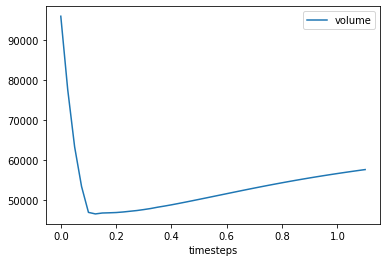

In [75]:
lv.volume()
lv.plot_metric(lv.STATES.VOLUME, kind="line")

Longitudinal Distances:

Spks-data relationship not found for metric longitudinal_distances. Check 'set_data_spk_rel' or 'add_spk_data'.


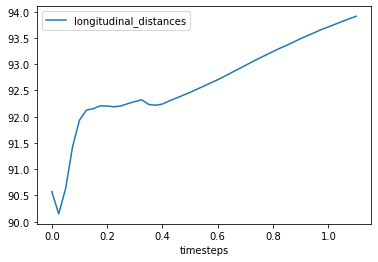

In [76]:
lv.longitudinal_distances()
lv.plot_metric(lv.STATES.LONG_DISTS, kind="line")

### Geo Metrics that do require speckles:

Radius (for each spk):

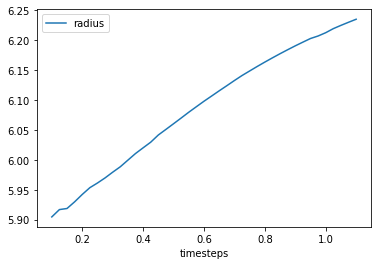

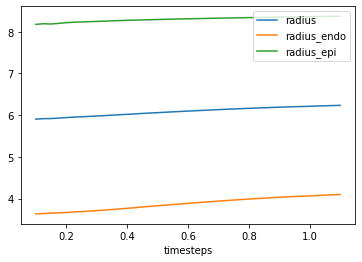

In [77]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radius(circ_spks)
lv.plot_metric(lv.STATES.RADIUS, 
    from_ts=0.1,
    plot_infos=["group"])

Thickness

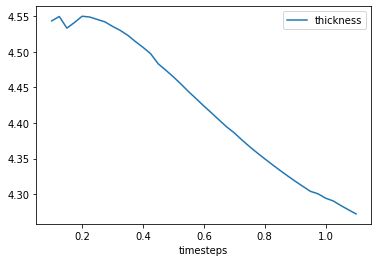

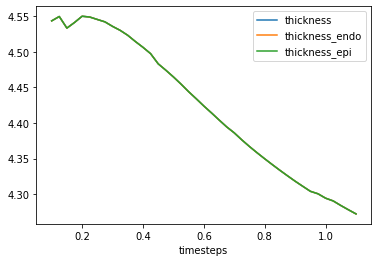

In [78]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.thickness(endo_circ_spks, epi_circ_spks)
lv.plot_metric(lv.STATES.THICKNESS, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal Length:

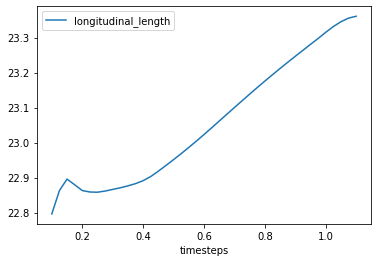

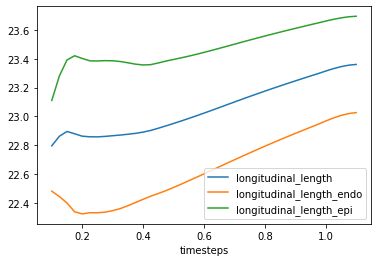

In [79]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_length(long_spks)
lv.plot_metric(lv.STATES.LONG_LENGTH, 
    from_ts=0.1,
    plot_infos=["group"])

Circumferential Length:

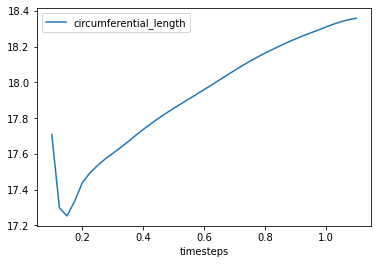

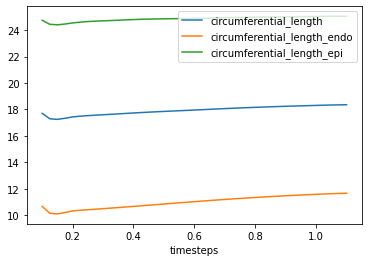

In [80]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_length(circ_spks)
lv.plot_metric(lv.STATES.CIRC_LENGTH, 
    from_ts=0.1,
    plot_infos=["group"])

Rotation:

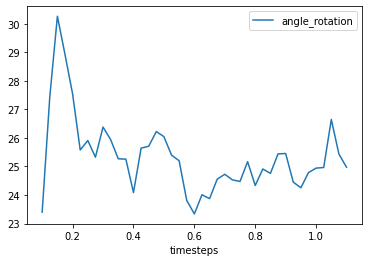

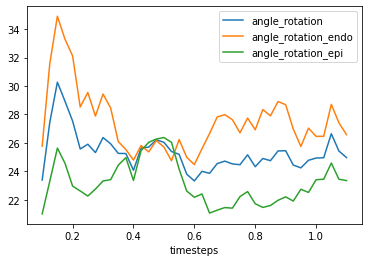

In [81]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.rotation(circ_spks)
lv.plot_metric(lv.STATES.ROTATION, 
    from_ts=0.1,
    plot_infos=["group"])

## Clinical Metrics:

### Clinical metrics that do not require speckles

Ejection Fraction

Spks-data relationship not found for metric volumetric_fraction. Check 'set_data_spk_rel' or 'add_spk_data'.


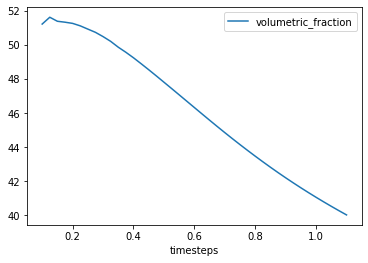

In [82]:
lv.ejection_fraction()
lv.plot_metric(lv.STATES.EF, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal Shortening:

Spks-data relationship not found for metric longitudinal_shortening. Check 'set_data_spk_rel' or 'add_spk_data'.


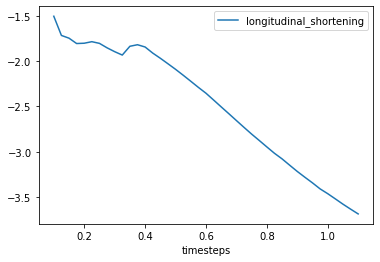

In [83]:
lv.longitudinal_shortening()
lv.plot_metric(lv.STATES.LS, 
    from_ts=0.1,
    plot_infos=["group"])

### Clinical metrics that require speckles

Radial shortening

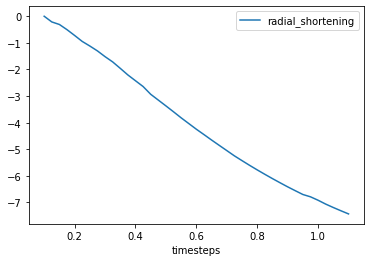

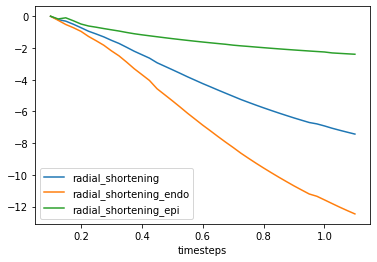

In [84]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radial_shortening(circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.RS, 
    from_ts=0.1,
    plot_infos=["group"])

Wall thickening:

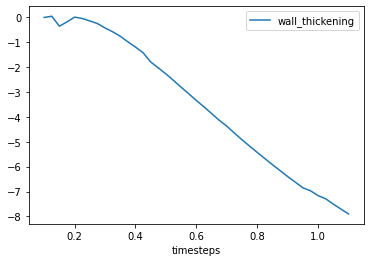

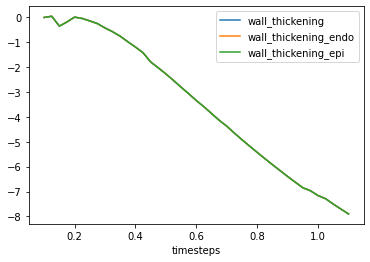

In [85]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.wall_thickening(endo_circ_spks, epi_circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.WT, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal strain:

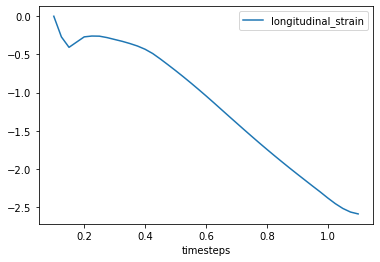

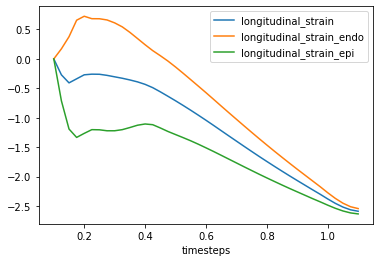

In [86]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_strain(long_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SL, 
    from_ts=0.1,
    plot_infos=["group"])

Circumferential Strain:

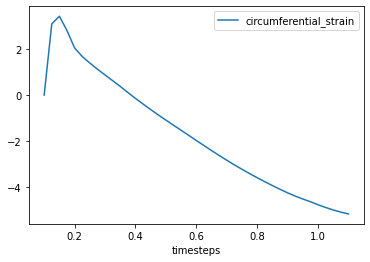

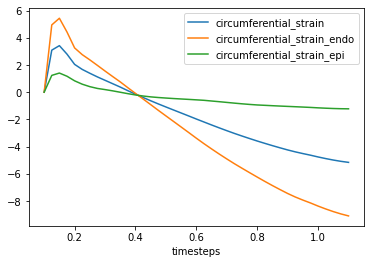

In [87]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_strain(circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SC, 
    from_ts=0.1,
    plot_infos=["group"])

Twist:

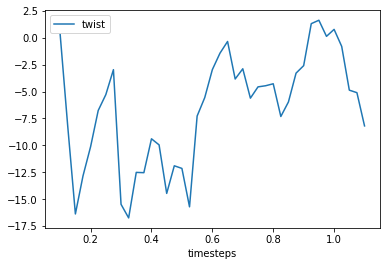

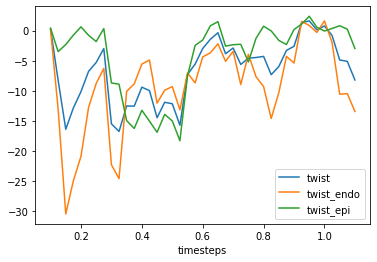

In [88]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.twist(apex_spks, base_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.TW, 
    from_ts=0.1,
    plot_infos=["group"])

Torsion:

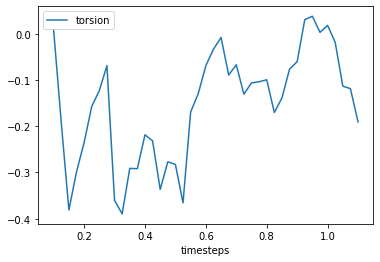

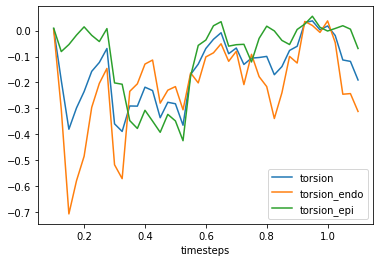

In [89]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.torsion(apex_spks, base_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.TO, 
    from_ts=0.1,
    plot_infos=["group"])